In [1]:
import QuantLib as ql
import utils
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def binomial_price(option, bsm_process, steps):
    binomial_engine = ql.BinomialVanillaEngine(bsm_process, "crr", steps)
    option.setPricingEngine(binomial_engine)
    return option.NPV()

In [3]:
def graph_option_cost(american_option, bsm_process):
    steps = range(2, 200, 1)
    prices = [binomial_price(american_option, bsm_process, step) for step in steps]

    fig, ax = plt.subplots()
    ax.plot(steps, prices, label="Binomial Tree Price", lw=2, alpha=0.6)
    # ax.plot([0,200],[bs_price, bs_price], "--", label="BSM Price", lw=2, alpha=0.6)
    ax.set_xlabel("Steps", size=14)
    ax.set_ylabel("Price", size=14)
    ax.set_title("Binomial Tree Price For Varying Steps", size=14)
    ax.legend();
    return prices[-1]

In [4]:
def option_price(calculation_day, calculation_month, calculation_year, maturity_day, maturity_month, maturity_year, spot_price, strike_price, volatility, dividend_rate, is_call, risk_free_rate):
    maturity_date = ql.Date(maturity_day, maturity_month, maturity_year)
    calculation_date = ql.Date(calculation_day, calculation_month, calculation_year)
    option_type = ql.Option.Call if is_call else ql.Option.Put

    day_count = ql.Actual365Fixed()
    calendar = ql.UnitedStates(ql.UnitedStates.GovernmentBond)

    ql.Settings.instance().evaluationDate = calculation_date

    payoff = ql.PlainVanillaPayoff(option_type, strike_price)
    settlement = calculation_date
    am_exercise = ql.AmericanExercise(settlement, maturity_date)
    american_option = ql.VanillaOption(payoff, am_exercise)

    spot_handle = ql.QuoteHandle(
        ql.SimpleQuote(spot_price)
    )
    flat_ts = ql.YieldTermStructureHandle(
    ql.FlatForward(
        calculation_date, 
        risk_free_rate, 
        day_count)
    )
    dividend_yield = ql.YieldTermStructureHandle(
    ql.FlatForward(
        calculation_date, 
        dividend_rate, 
        day_count)
    )
    flat_vol_ts = ql.BlackVolTermStructureHandle(
    ql.BlackConstantVol(
        calculation_date, 
        calendar, 
        volatility, 
        day_count)
    )
    bsm_process = ql.BlackScholesMertonProcess(spot_handle, 
                                    dividend_yield, 
                                    flat_ts, 
                                    flat_vol_ts)

    return graph_option_cost(american_option, bsm_process)

6.84365807139398

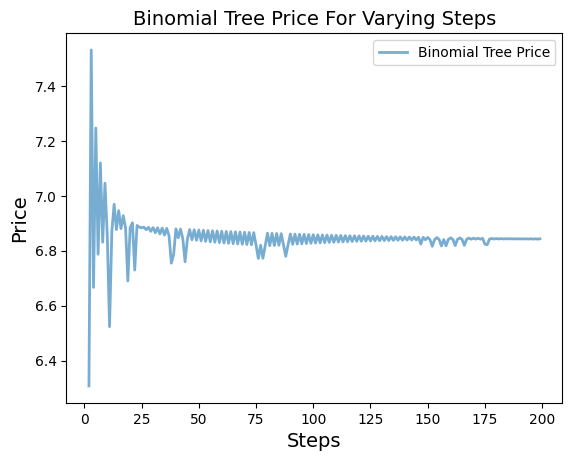

In [5]:
option_price(8, 5, 2015, 15, 1, 2016, 127.62, 130, 0.20, 0.0163, True, 0.001)

6.960960720464367

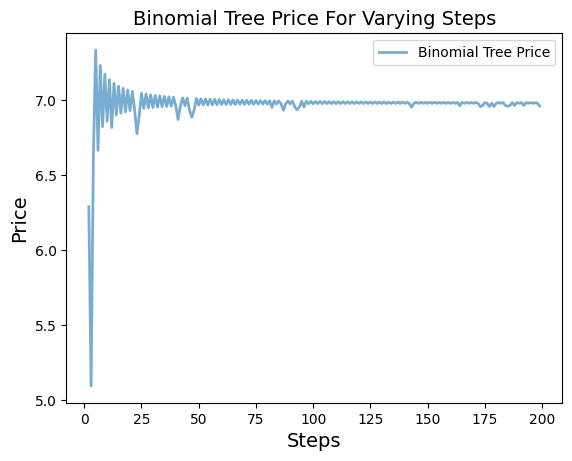

In [10]:
option_price(29, 11, 2023, 8, 12, 2023, 244.51, 245, .4628, 0, True, 0.0434)

In [3]:
maturity_date = ql.Date(15, 1, 2016)
spot_price = 127.62
strike_price = 130
volatility = 0.20 # the historical vols for a year
dividend_rate =  0.0163
option_type = ql.Option.Call

risk_free_rate = 0.001
day_count = ql.Actual365Fixed()
calendar = ql.UnitedStates(ql.UnitedStates.GovernmentBond)

calculation_date = ql.Date(8, 5, 2015)
ql.Settings.instance().evaluationDate = calculation_date

In [4]:
payoff = ql.PlainVanillaPayoff(option_type, strike_price)
exercise = ql.EuropeanExercise(maturity_date)
european_option = ql.VanillaOption(payoff, exercise)

In [5]:
spot_handle = ql.QuoteHandle(
    ql.SimpleQuote(spot_price)
)
flat_ts = ql.YieldTermStructureHandle(
ql.FlatForward(
    calculation_date, 
    risk_free_rate, 
    day_count)
)
dividend_yield = ql.YieldTermStructureHandle(
ql.FlatForward(
    calculation_date, 
    dividend_rate, 
    day_count)
)
flat_vol_ts = ql.BlackVolTermStructureHandle(
ql.BlackConstantVol(
    calculation_date, 
    calendar, 
    volatility, 
    day_count)
)
bsm_process = ql.BlackScholesMertonProcess(spot_handle, 
                                dividend_yield, 
                                flat_ts, 
                                flat_vol_ts)

In [6]:
european_option.setPricingEngine(ql.AnalyticEuropeanEngine(bsm_process))
bs_price = european_option.NPV()
print("The theoretical price is %lf" % bs_price)

The theoretical price is 6.749272


In [7]:
def binomial_price(option, bsm_process, steps):
    binomial_engine = ql.BinomialVanillaEngine(bsm_process, "crr", steps)
    option.setPricingEngine(binomial_engine)
    return option.NPV()
        
steps = range(2, 200, 1)
prices = [binomial_price(european_option, bsm_process, step) for step in steps]

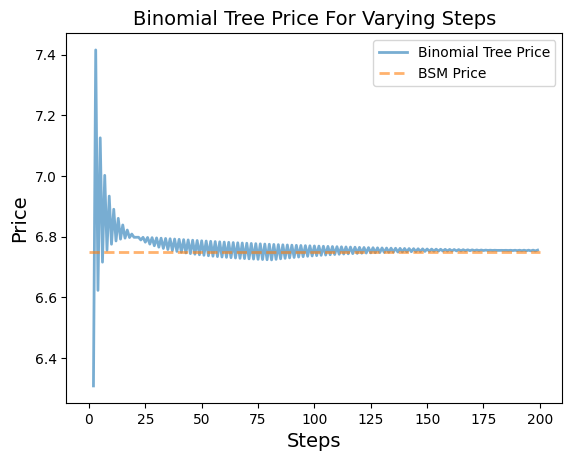

In [11]:


fig, ax = plt.subplots()

ax.plot(steps, prices, label="Binomial Tree Price", lw=2, alpha=0.6)
ax.set_xlabel("Steps", size=14)
ax.set_ylabel("Price", size=14)
ax.set_title("Binomial Tree Price For Varying Steps", size=14)
ax.legend();

In [12]:
payoff = ql.PlainVanillaPayoff(option_type, strike_price)
settlement = calculation_date
am_exercise = ql.AmericanExercise(settlement, maturity_date)
american_option = ql.VanillaOption(payoff, am_exercise)

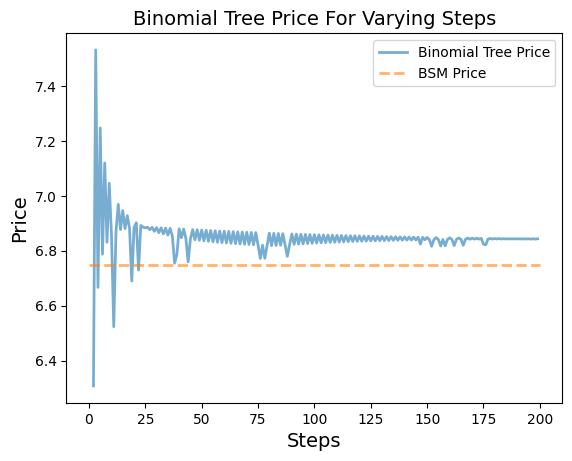

In [14]:
steps = range(2, 200, 1)
prices = [binomial_price(american_option, bsm_process, step) for step in steps]

fig, ax = plt.subplots()
ax.plot(steps, prices, label="Binomial Tree Price", lw=2, alpha=0.6)
ax.plot([0,200],[bs_price, bs_price], "--", label="BSM Price", lw=2, alpha=0.6)
ax.set_xlabel("Steps", size=14)
ax.set_ylabel("Price", size=14)
ax.set_title("Binomial Tree Price For Varying Steps", size=14)
ax.legend();